<a href="https://colab.research.google.com/github/SkandarEverest/praktikum_ml/blob/main/IF5140_Praktikum_5_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ramdinal Aviesena Zairinal. 23224092

# Fadhil Rausyanfikr
# 23525046

# IMPORT DATASET DAN LIBRARY

In [ ]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

import os
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline


# EDA (Exploratory Data Analysis)

INFORMASI DASAR DATASET

In [ ]:
# 2. IMPORT DATASET CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train images:", x_train.shape)   # (50000, 32, 32, 3)
print("Train labels:", y_train.shape)   # (50000, 1)
print("Test images :", x_test.shape)    # (10000, 32, 32, 3)
print("Test labels :", y_test.shape)    # (10000, 1)

# Mapping label ke nama kelas
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train images: (50000, 32, 32, 3)
Train labels: (50000, 1)
Test images : (10000, 32, 32, 3)
Test labels : (10000, 1)


Dataset terdiri atas train set dan test set. Train set terdiri atas 50000 image, berukuran 32x32, dengan 3 channel RGB. Test set terdiri atas 10000 image, berukuran 32x32, dengan 3 channel RGB. Label pada train set dan test set ada 1, yaitu kelas image. Kelas image ada 10 buah, yaitu airplane, automobile, bird, cat, deer, dog, frog, horse, ship, dan truck.

In [ ]:
import numpy as np

print('--- x_train description ---')
print('Shape:', x_train.shape)
print('Data type:', x_train.dtype)
print('Min value:', np.min(x_train))
print('Max value:', np.max(x_train))
print('Mean value:', np.mean(x_train))

print('\n--- y_train description ---')
print('Shape:', y_train.shape)
print('Data type:', y_train.dtype)
print('Unique classes:', np.unique(y_train))
print('Min class label:', np.min(y_train))
print('Max class label:', np.max(y_train))

--- x_train description ---
Shape: (50000, 32, 32, 3)
Data type: uint8
Min value: 0
Max value: 255
Mean value: 120.70756512369792

--- y_train description ---
Shape: (50000, 1)
Data type: uint8
Unique classes: [0 1 2 3 4 5 6 7 8 9]
Min class label: 0
Max class label: 9


In [ ]:
print('--- x_test description ---')
print('Shape:', x_test.shape)
print('Data type:', x_test.dtype)
print('Min value:', np.min(x_test))
print('Max value:', np.max(x_test))
print('Mean value:', np.mean(x_test))

print('\n--- y_test description ---')
print('Shape:', y_test.shape)
print('Data type:', y_test.dtype)
print('Unique classes:', np.unique(y_test))
print('Min class label:', np.min(y_test))
print('Max class label:', np.max(y_test))

--- x_test description ---
Shape: (10000, 32, 32, 3)
Data type: uint8
Min value: 0
Max value: 255
Mean value: 121.52915475260417

--- y_test description ---
Shape: (10000, 1)
Data type: uint8
Unique classes: [0 1 2 3 4 5 6 7 8 9]
Min class label: 0
Max class label: 9


In [ ]:
def plot_sample (x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x_train[index])
    plt.xlabel(class_names[y_train[index][0]])

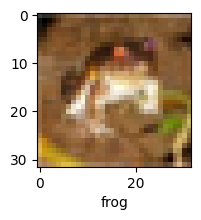

In [ ]:
# menampilkan contoh image beserta label

plot_sample(x_train, y_train, 0)


MENAMPILKAN DISTIRBUSI SETIAP KELAS

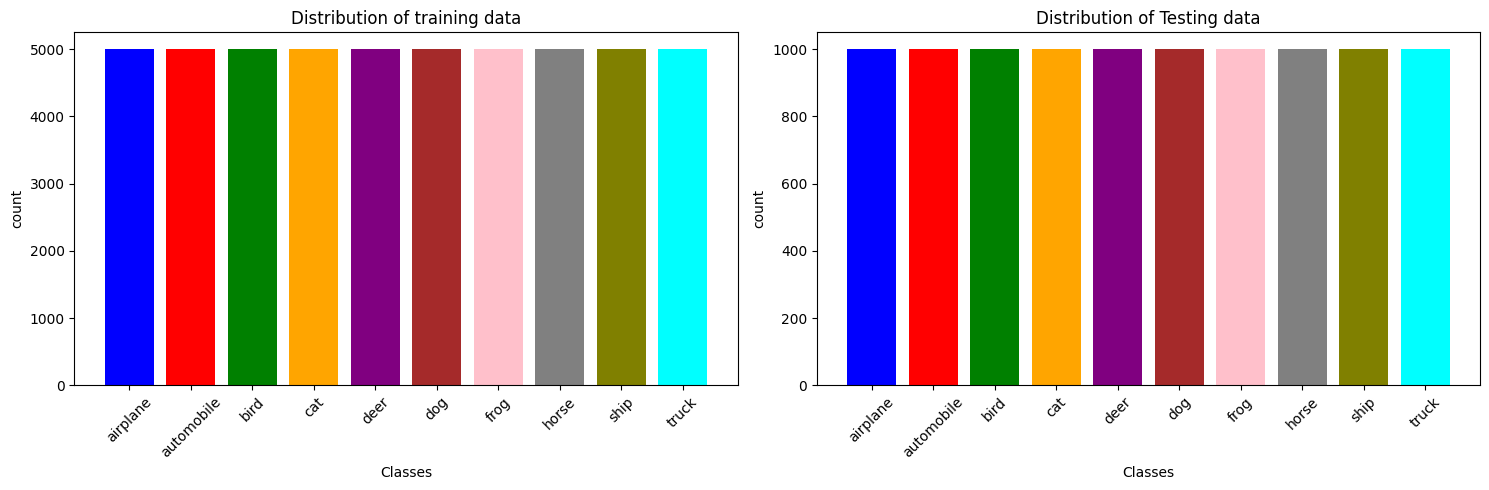

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definisikan list warna
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Hitung jumlah kemunculan setiap kelas di y_train dan y_test
train_counts = np.bincount(y_train.flatten())
test_counts = np.bincount(y_test.flatten())

# Ambil hanya warna sebanyak jumlah kelas
num_classes = len(class_names)
bar_colors = colors[:num_classes]

# Buat figure dengan dua subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot distribusi data training
# 2. Tambahkan parameter 'color' dengan list warna
axs[0].bar(range(num_classes), train_counts, tick_label=class_names, color=bar_colors)
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('count')
axs[0].tick_params(axis='x', rotation=45)

# Plot distribusi data testing
# 3. Tambahkan parameter 'color' yang sama
axs[1].bar(range(num_classes), test_counts, tick_label=class_names, color=bar_colors)
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('count')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Terdapat 10 kelas pada train set dan test set. Masing-masing kelas terdiri atas 5000 image.

MENAMPILKAN 5 CONTOH GAMBAR UNTUK SETIAP KELAS

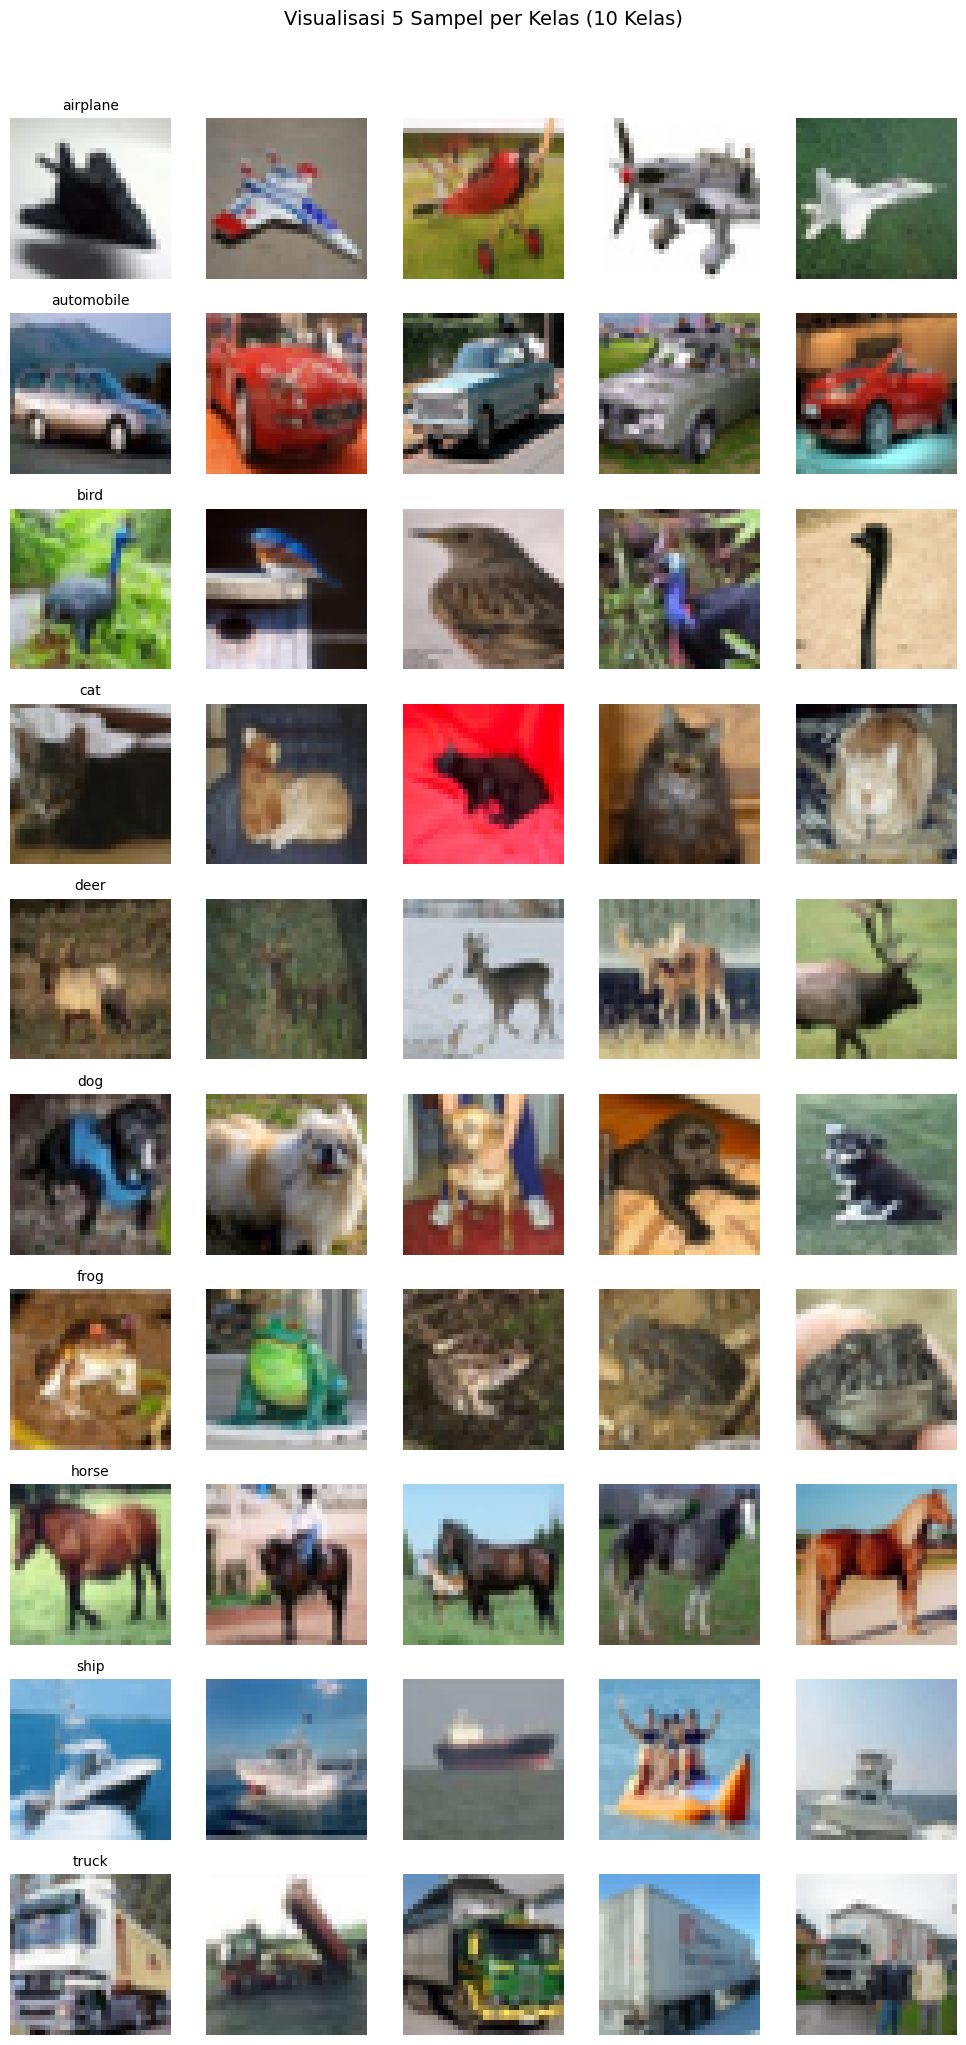

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Konfigurasi ---
num_classes = 10
images_per_class = 5

# Ukuran grid
ROWS = num_classes
COLS = images_per_class

# Pastikan y_train dalam bentuk 1D
y_train_flat = y_train.flatten()

# 1. TAHAP PERTAMA: Kumpulkan semua indeks gambar yang akan ditampilkan (Total 50)
display_indices = []
for c in range(num_classes):
    # Dapatkan indeks untuk kelas 'c'
    indices = np.where(y_train_flat == c)[0]
    # Tambahkan 5 indeks pertama ke list
    display_indices.extend(indices[:images_per_class])

# ----------------------------------------------------------------------
# 2. TAHAP KEDUA: Visualisasikan 50 gambar yang sudah dikumpulkan
plt.figure(figsize=(2 * COLS, 2 * ROWS))

# Gunakan satu loop untuk plotting 50 gambar
for i, img_idx in enumerate(display_indices):
    # Plotting ke subplot berikutnya (i + 1)
    plt.subplot(ROWS, COLS, i + 1)
    plt.imshow(x_train[img_idx])

    # Tentukan indeks kelas saat ini (baris) untuk judul
    class_index = i // COLS

    # Beri judul hanya pada gambar pertama di setiap baris/kelas
    if i % COLS == 0:
        plt.title(class_names[class_index], fontsize=10)

    plt.axis("off")

plt.suptitle(f'Visualisasi {images_per_class} Sampel per Kelas ({num_classes} Kelas)', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

Berikut contoh 5 image untuk masing-masing kelas.

MENAMPILKAN DISTRIBUSI UNTUK SETIAP CHANNEL RGB

In [ ]:
# Ambil channel RGB dari seluruh gambar train
red_channel   = x_train[:,:,:,0].flatten()
green_channel = x_train[:,:,:,1].flatten()
blue_channel  = x_train[:,:,:,2].flatten()


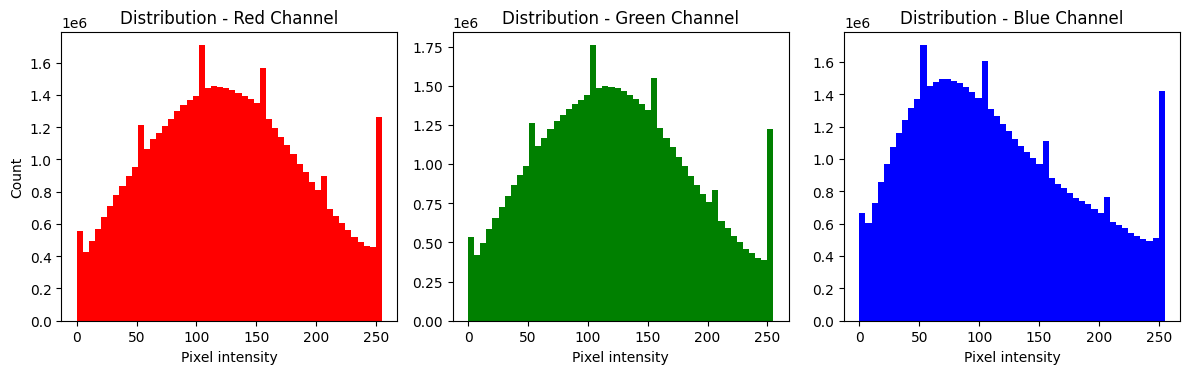

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(red_channel, bins=50, color="red")
plt.title("Distribution - Red Channel")
plt.xlabel("Pixel intensity")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(green_channel, bins=50, color="green")
plt.title("Distribution - Green Channel")
plt.xlabel("Pixel intensity")

plt.subplot(1,3,3)
plt.hist(blue_channel, bins=50, color="blue")
plt.title("Distribution - Blue Channel")
plt.xlabel("Pixel intensity")

plt.tight_layout()
plt.show()


ketiga channel menunjukkan pola distribusi hampir normal, berbentuk lonceng dengan nilai puncak berada di pixel intensity kisaran 100-150 dan memiliki nilai rendah < 20 dan tinggi < 200. Hal ini menunjukkan rentang yang cukup baik. Terdapat spike di intensitas ekstrem, mungkin karena highlight terang atau batas sensor.

# Data Preprocessing

In [ ]:
# Normalize the data. Before we need to convert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Convert class vectors to binary class matrices (one-hot encoding).
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
x_train[:5]

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

# Modelling without Data Augmentation

Optimizer = adam

In [ ]:
from tensorflow.keras.layers import Input

cnn = Sequential([
    Input(shape=(32, 32, 3)), # Recommended way to define input shape
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
  ])

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3787 - loss: 1.7067
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5926 - loss: 1.1642
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6504 - loss: 0.9934
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6929 - loss: 0.8861
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7116 - loss: 0.8252
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7350 - loss: 0.7678
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7505 - loss: 0.7192
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7654 - loss: 0.6691
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7834 - loss: 0.6257
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7952 - loss: 0.5929


In [ ]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7046 - loss: 0.9191


[0.9312383532524109, 0.7013000249862671]

Optimizer = RMSprop

In [ ]:
from tensorflow.keras.layers import Input

cnn = Sequential([
    Input(shape=(32, 32, 3)), # Recommended way to define input shape
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
  ])

opt = RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
cnn.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)


cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2560 - loss: 2.0606
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4265 - loss: 1.6214
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4790 - loss: 1.4705
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5159 - loss: 1.3789
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5344 - loss: 1.3250
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5572 - loss: 1.2735
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5648 - loss: 1.2400
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5874 - loss: 1.1902
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5914 - loss: 1.1711
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6070 - loss: 1.1324


In [ ]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5990 - loss: 1.1530


[1.157908320426941, 0.5957000255584717]

In [ ]:
# Training
history = cnn.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),  # supaya ada val_loss & val_accuracy
    batch_size=32,
    verbose=1
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6169 - loss: 1.1036 - val_accuracy: 0.5927 - val_loss: 1.1674
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6315 - loss: 1.0749 - val_accuracy: 0.6142 - val_loss: 1.1032
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6366 - loss: 1.0511 - val_accuracy: 0.6133 - val_loss: 1.1125
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6487 - loss: 1.0301 - val_accuracy: 0.6186 - val_loss: 1.0865
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6522 - loss: 1.0105 - val_accuracy: 0.6272 - val_loss: 1.0717
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6587 - loss: 0.9848 - val_accuracy: 0.6196 - val_loss: 1.0857
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6711 - loss: 0.9594 - val_accuracy: 0.6468 - val_loss: 1.0160
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6733 - loss: 0.9490 - 

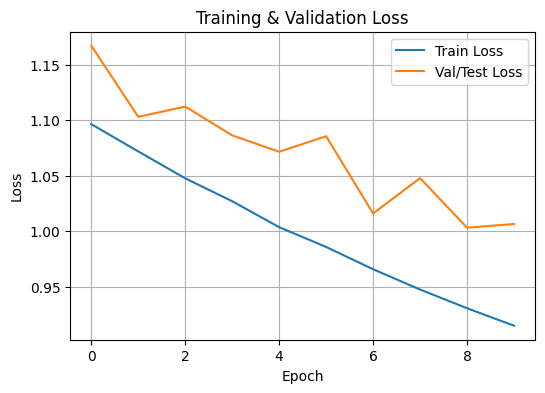

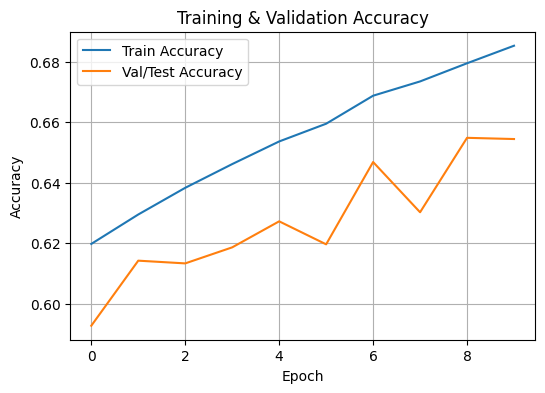

In [ ]:


# Plot Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val/Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69      1000
           1       0.82      0.68      0.74      1000
           2       0.52      0.54      0.53      1000
           3       0.51      0.46      0.48      1000
           4       0.68      0.54      0.60      1000
           5       0.54      0.63      0.58      1000
           6       0.83      0.66      0.73      1000
           7       0.72      0.72      0.72      1000
           8       0.70      0.81      0.75      1000
           9       0.66      0.76      0.71      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



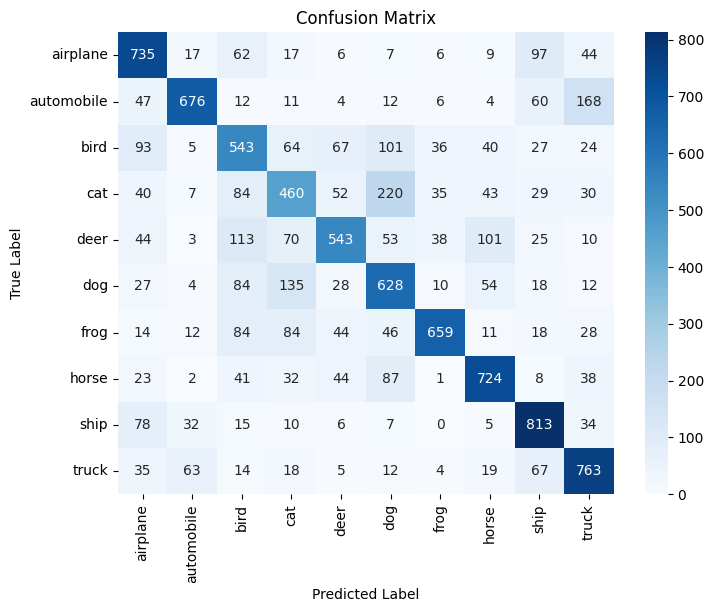

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix


# Prediksi probabilitas
y_pred_prob = cnn.predict(x_test)

# Ubah ke label kelas (0–9)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)   # karena y_test masih one-hot

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Merubah learning rate

In [ ]:
from tensorflow.keras.layers import Input

cnn = Sequential([
    Input(shape=(32, 32, 3)), # Recommended way to define input shape
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
  ])

opt = RMSprop(learning_rate=0.001, decay=1e-6)

# Let's train the model using RMSprop
cnn.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)


cnn.fit(x_train, y_train, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3484 - loss: 1.7721
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5808 - loss: 1.1871
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6475 - loss: 1.0121
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6869 - loss: 0.9056
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7150 - loss: 0.8284
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7432 - loss: 0.7443
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7624 - loss: 0.6821
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7834 - loss: 0.6170
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7979 - loss: 0.5781
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8178 - loss: 0.5320


In [ ]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6996 - loss: 0.9704


[0.9650331139564514, 0.7052000164985657]

In [ ]:
# Training
history = cnn.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),  # supaya ada val_loss & val_accuracy
    batch_size=32,
    verbose=1
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8330 - loss: 0.4849 - val_accuracy: 0.6862 - val_loss: 1.0432
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8487 - loss: 0.4438 - val_accuracy: 0.7045 - val_loss: 1.0109
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8603 - loss: 0.4057 - val_accuracy: 0.6995 - val_loss: 1.0697
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8732 - loss: 0.3701 - val_accuracy: 0.6661 - val_loss: 1.2412
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8813 - loss: 0.3455 - val_accuracy: 0.6905 - val_loss: 1.2421
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8922 - loss: 0.3135 - val_accuracy: 0.6922 - val_loss: 1.2461
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9017 - loss: 0.2867 - val_accuracy: 0.6877 - val_loss: 1.3707
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9104 - loss: 0.2626 -

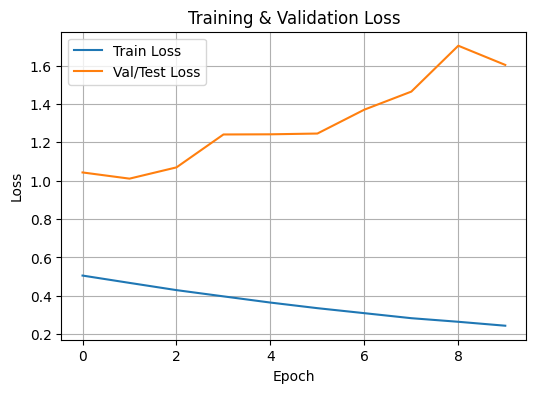

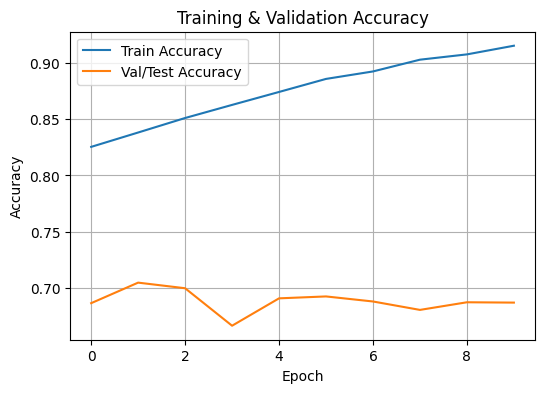

In [ ]:
# Plot Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val/Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1000
           1       0.89      0.75      0.81      1000
           2       0.53      0.63      0.57      1000
           3       0.53      0.42      0.47      1000
           4       0.62      0.63      0.62      1000
           5       0.57      0.59      0.58      1000
           6       0.70      0.82      0.75      1000
           7       0.74      0.73      0.74      1000
           8       0.78      0.83      0.80      1000
           9       0.79      0.80      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



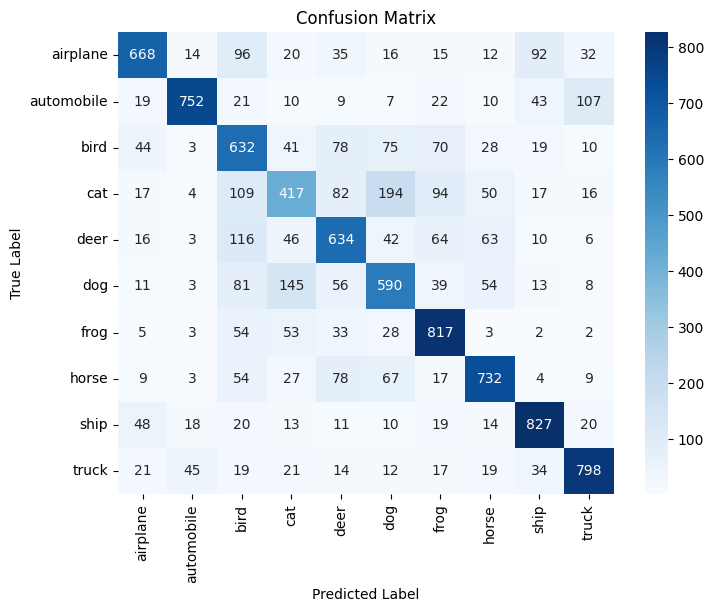

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Prediksi probabilitas
y_pred_prob = cnn.predict(x_test)

# Ubah ke label kelas (0–9)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)   # karena y_test masih one-hot

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred[:5]

array([3, 8, 0, 0, 4])

In [ ]:
y_true[:5]

array([3, 8, 8, 0, 6])

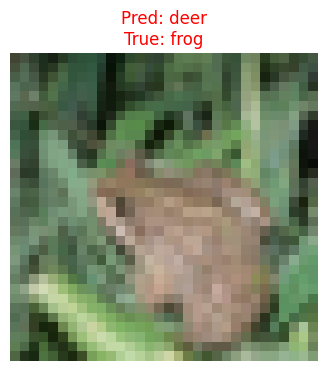

In [ ]:
import matplotlib.pyplot as plt

# Nama kelas CIFAR-10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

idx = 4

img = x_test[idx]
true_label = class_names[y_true[idx]]
pred_label = class_names[y_pred[idx]]

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis('off')

# warna hijau = benar, merah = salah
color = "green" if pred_label == true_label else "red"

plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
plt.show()


Analisis Kesalahan

Prediksi bisa tidak sesuai dengan kenyataan karena resolusi gambar yang sangat rendah (32×32 piksel). Pada resolusi tersebut, detail morfologis hewan tidak tampak jelas, sehingga model lebih mengandalkan pola global seperti warna, tekstur, dan latar belakang. Pada gambar yang salah diprediksi, objek katak memiliki warna coklat kehijauan dan berada pada latar vegetasi, sehingga pola tekstur dan warnanya menyerupai gambar-gambar kelas “deer” dalam dataset yang juga banyak berada di lingkungan alami dengan vegetasi hijau.

Merubah batch

In [ ]:
from tensorflow.keras.layers import Input

cnn = Sequential([
    Input(shape=(32, 32, 3)), # Recommended way to define input shape
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
  ])

opt = RMSprop(learning_rate=0.001, decay=1e-6)

# Let's train the model using RMSprop
cnn.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)


cnn.fit(x_train, y_train, epochs=10)

# Training
history = cnn.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),  # supaya ada val_loss & val_accuracy
    batch_size=128,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3620 - loss: 1.7491
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5853 - loss: 1.1763
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6543 - loss: 0.9972
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6895 - loss: 0.8986
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7205 - loss: 0.8088
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7514 - loss: 0.7323
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7717 - loss: 0.6645
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7892 - loss: 0.6181
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8097 - loss: 0.5516
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8247 - loss: 0.5113
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8681 - loss: 0.3921 - val_accuracy: 0.7101 - val_los

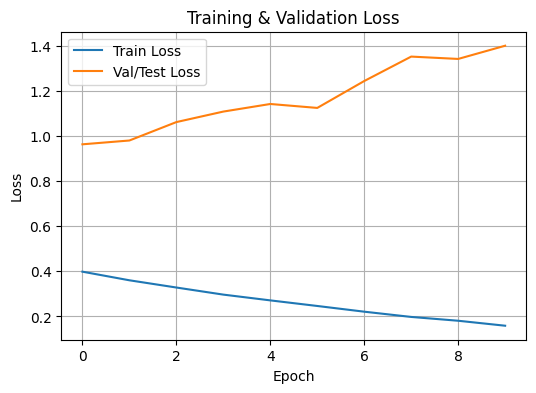

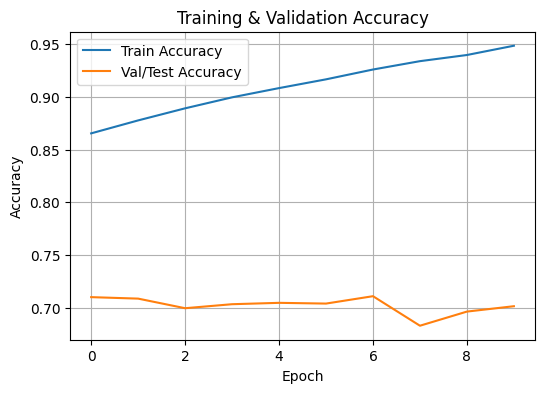

In [ ]:
# Plot Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val/Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1000
           1       0.81      0.81      0.81      1000
           2       0.56      0.64      0.60      1000
           3       0.53      0.47      0.50      1000
           4       0.67      0.60      0.63      1000
           5       0.62      0.54      0.58      1000
           6       0.73      0.81      0.77      1000
           7       0.73      0.79      0.76      1000
           8       0.84      0.78      0.81      1000
           9       0.76      0.81      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



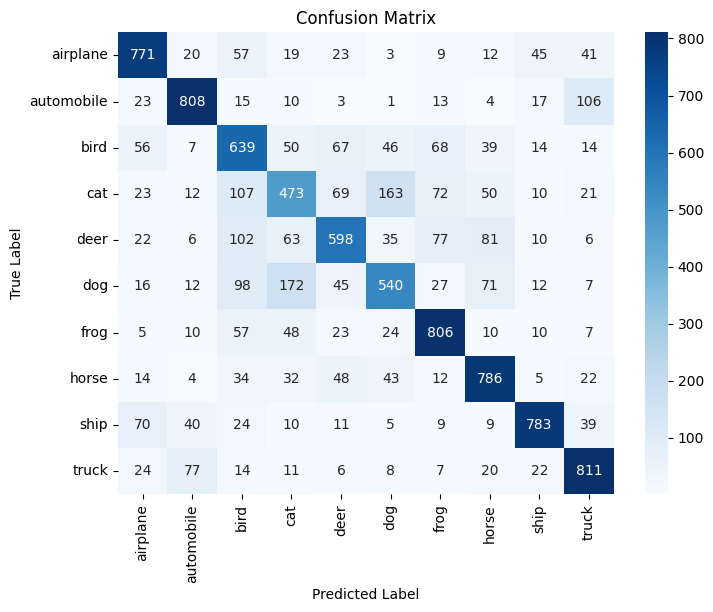

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Prediksi probabilitas
y_pred_prob = cnn.predict(x_test)

# Ubah ke label kelas (0–9)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)   # karena y_test masih one-hot

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred[:5]

array([3, 8, 0, 8, 6])

In [ ]:
y_true[:5]

array([3, 8, 8, 0, 6])

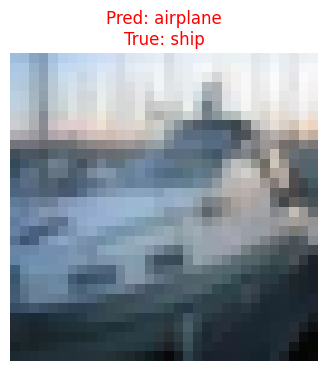

In [ ]:
# Nama kelas CIFAR-10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

idx = 2

img = x_test[idx]
true_label = class_names[y_true[idx]]
pred_label = class_names[y_pred[idx]]

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis('off')

# warna hijau = benar, merah = salah
color = "green" if pred_label == true_label else "red"

plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
plt.show()

Analisis kesalahan

Misklasifikasi ship dengan airplane terjadi karena resolusi gambar CIFAR-10 yang sangat rendah sehingga detail bentuk kapal tidak tampak jelas dan hanya menyisakan pola warna biru–putih dengan latar horizon yang menyerupai citra pesawat di langit. Dengan arsitektur CNN yang masih sederhana, model lebih mengandalkan pola warna dan tekstur dibandingkan fitur bentuk yang spesifik, sehingga gambar kapal dengan latar laut/langit mudah tertukar dengan kelas airplane.

Merubah jumlah layer convolutional

In [ ]:
from tensorflow.keras.layers import Input

cnn = Sequential([
    Input(shape=(32, 32, 3)), # Recommended way to define input shape
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
  ])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4043 - loss: 1.6526
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5729 - loss: 1.2062
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6200 - loss: 1.0782
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6478 - loss: 1.0065
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6654 - loss: 0.9513
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6887 - loss: 0.8884
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7010 - loss: 0.8440
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7201 - loss: 0.7983
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7367 - loss: 0.7593
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7525 - loss: 0.7144


In [ ]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6433 - loss: 1.0431


[1.0687845945358276, 0.6431000232696533]

In [ ]:
history = cnn.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),   # supaya ada val_loss & val_accuracy
    verbose=1
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7568 - loss: 0.6910 - val_accuracy: 0.6365 - val_loss: 1.0912
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7718 - loss: 0.6503 - val_accuracy: 0.6444 - val_loss: 1.1296
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7820 - loss: 0.6243 - val_accuracy: 0.6305 - val_loss: 1.1752
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7934 - loss: 0.5878 - val_accuracy: 0.6281 - val_loss: 1.1628
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8094 - loss: 0.5520 - val_accuracy: 0.6271 - val_loss: 1.2444
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8158 - loss: 0.5207 - val_accuracy: 0.6387 - val_loss: 1.2001
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8303 - loss: 0.4874 - val_accuracy: 0.6112 - val_loss: 1.3525
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8334 - loss: 0.4727 - 

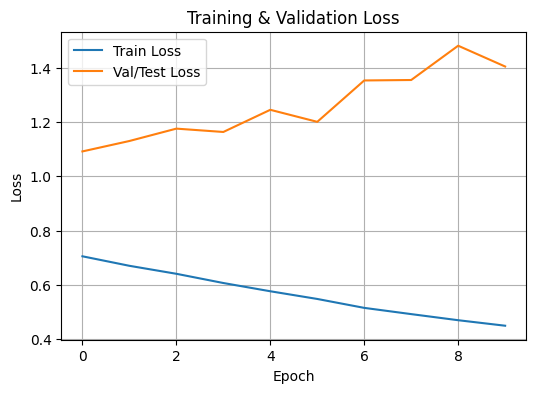

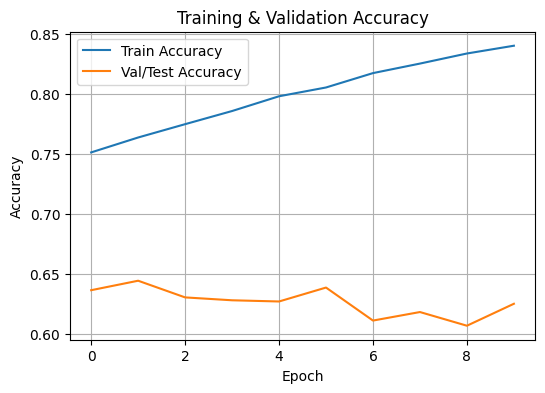

In [ ]:
# Plot Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val/Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66      1000
           1       0.80      0.66      0.73      1000
           2       0.49      0.51      0.50      1000
           3       0.40      0.52      0.45      1000
           4       0.60      0.52      0.56      1000
           5       0.54      0.51      0.52      1000
           6       0.69      0.71      0.70      1000
           7       0.69      0.71      0.70      1000
           8       0.72      0.76      0.74      1000
           9       0.71      0.72      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



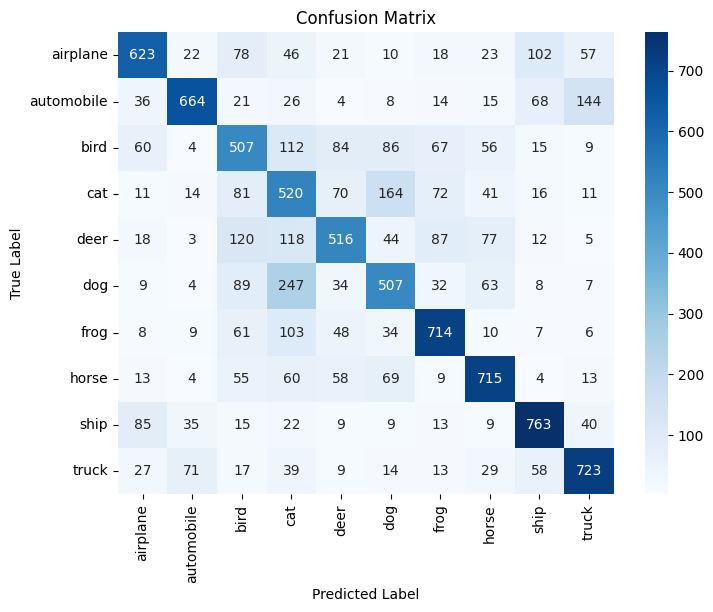

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Prediksi probabilitas
y_pred_prob = cnn.predict(x_test)

# Ubah ke label kelas (0–9)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)   # karena y_test masih one-hot

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Merubah ukuran kernel pada setiap convolutional layer

In [ ]:
from tensorflow.keras.layers import Input

cnn = Sequential([
    Input(shape=(32, 32, 3)), # Recommended way to define input shape
    Conv2D(filters=32, kernel_size=(4, 4), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(6, 6), activation='relu'),
    MaxPooling2D((2, 2)),


    Flatten(),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
  ])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3479 - loss: 1.7651
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5265 - loss: 1.3208
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5828 - loss: 1.1831
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6068 - loss: 1.1081
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6310 - loss: 1.0389
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6478 - loss: 1.0000
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6610 - loss: 0.9641
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6767 - loss: 0.9141
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6937 - loss: 0.8766
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6960 - loss: 0.8513


In [ ]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6907 - loss: 0.9002


[0.9003413319587708, 0.6909999847412109]

In [ ]:
history = cnn.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),   # supaya ada val_loss & val_accuracy
    verbose=1
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7896 - loss: 0.5862 - val_accuracy: 0.7096 - val_loss: 0.8882
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7981 - loss: 0.5724 - val_accuracy: 0.7112 - val_loss: 0.8835
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8008 - loss: 0.5630 - val_accuracy: 0.6965 - val_loss: 0.9660
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8075 - loss: 0.5461 - val_accuracy: 0.6993 - val_loss: 0.9386
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8056 - loss: 0.5489 - val_accuracy: 0.7049 - val_loss: 0.9137
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8100 - loss: 0.5355 - val_accuracy: 0.7075 - val_loss: 0.9073
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8072 - loss: 0.5385 - val_accuracy: 0.7088 - val_loss: 0.9087
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8117 - loss: 0.5266 - 

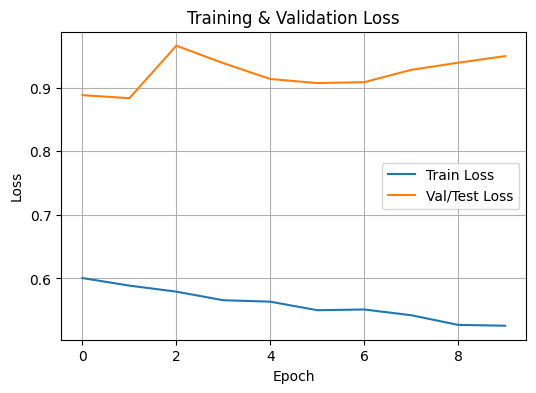

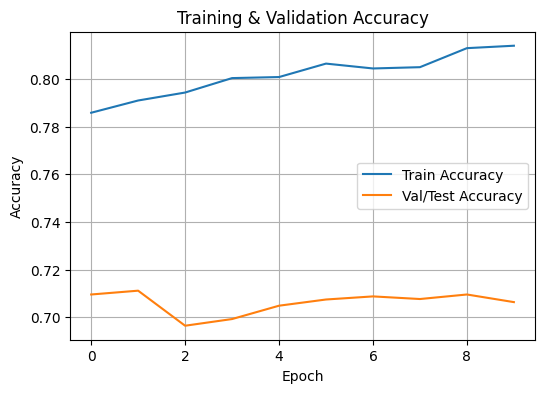

In [ ]:
# Plot Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val/Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

model cenderung kurang overfitting dengan memakai dropout 0,25

Merubah jumlah kernel pada setiap convolutional layer

In [ ]:
from tensorflow.keras.layers import Input

cnn = Sequential([
    Input(shape=(32, 32, 3)), # Recommended way to define input shape
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
  ])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3295 - loss: 1.8130
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5129 - loss: 1.3518
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5680 - loss: 1.2103
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6039 - loss: 1.1182
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6308 - loss: 1.0448
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6465 - loss: 0.9988
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6651 - loss: 0.9626
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6763 - loss: 0.9226
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6837 - loss: 0.8944
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6943 - loss: 0.8706


In [ ]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6789 - loss: 0.9318


[0.9366450905799866, 0.6748999953269958]

In [ ]:
history = cnn.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),   # supaya ada val_loss & val_accuracy
    verbose=1
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7004 - loss: 0.8510 - val_accuracy: 0.6885 - val_loss: 0.9050
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7123 - loss: 0.8267 - val_accuracy: 0.6834 - val_loss: 0.9173
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7134 - loss: 0.8115 - val_accuracy: 0.6780 - val_loss: 0.9277
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7183 - loss: 0.8008 - val_accuracy: 0.6982 - val_loss: 0.8761
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7253 - loss: 0.7821 - val_accuracy: 0.6963 - val_loss: 0.8863
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7281 - loss: 0.7725 - val_accuracy: 0.6915 - val_loss: 0.8954
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7324 - loss: 0.7585 - val_accuracy: 0.6763 - val_loss: 0.9399
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7342 - loss: 0.7566 - 

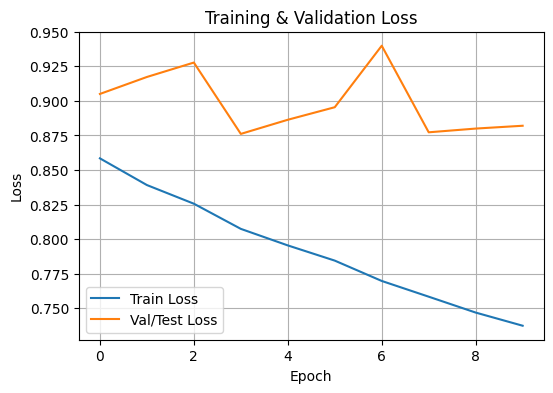

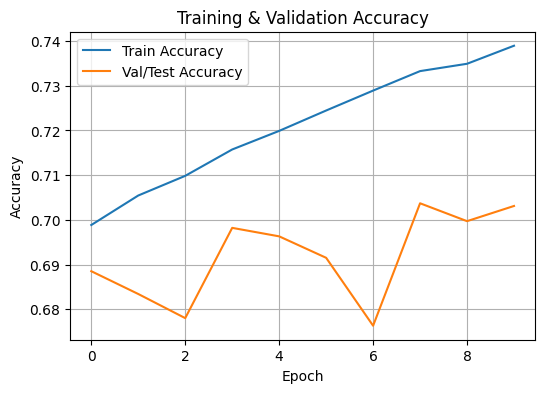

In [ ]:
# Plot Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val/Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.77      0.85      0.81      1000
           2       0.63      0.57      0.60      1000
           3       0.58      0.43      0.49      1000
           4       0.63      0.69      0.66      1000
           5       0.59      0.63      0.61      1000
           6       0.79      0.78      0.78      1000
           7       0.71      0.78      0.75      1000
           8       0.78      0.81      0.80      1000
           9       0.81      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



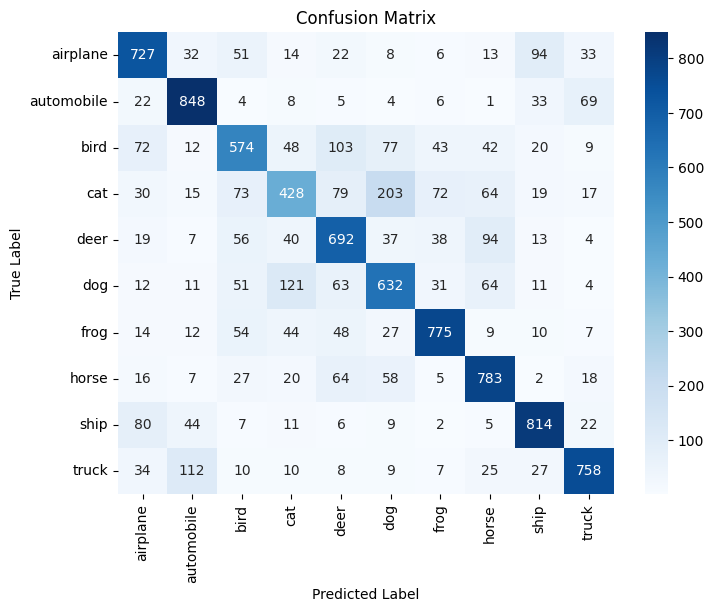

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Prediksi probabilitas
y_pred_prob = cnn.predict(x_test)

# Ubah ke label kelas (0–9)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)   # karena y_test masih one-hot

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred[:5]

array([3, 8, 8, 0, 4])

In [ ]:
y_true[:5]

array([3, 8, 8, 0, 6])

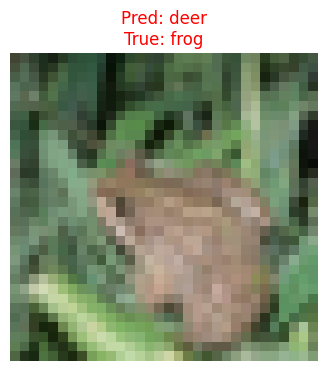

In [ ]:
# Nama kelas CIFAR-10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

idx = 4

img = x_test[idx]
true_label = class_names[y_true[idx]]
pred_label = class_names[y_pred[idx]]

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis('off')

# warna hijau = benar, merah = salah
color = "green" if pred_label == true_label else "red"

plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
plt.show()

Kesalahan serupa, misklasifikasi deer dengan frog

Penggunaan pooling layer, awalnya ada 2 pooling layer, kemudian menjadi 1 pooling layer

In [ ]:
from tensorflow.keras.layers import Input

cnn = Sequential([
    Input(shape=(32, 32, 3)), # Recommended way to define input shape
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),

    Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
  ])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3664 - loss: 1.7396
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5586 - loss: 1.2413
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6092 - loss: 1.0976
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6339 - loss: 1.0365
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6579 - loss: 0.9674
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6782 - loss: 0.9142
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6894 - loss: 0.8768
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7034 - loss: 0.8467
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7131 - loss: 0.8140
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7206 - loss: 0.7887


In [ ]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6725 - loss: 0.9703


[0.9774054884910583, 0.6685000061988831]

In [ ]:
history = cnn.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),   # supaya ada val_loss & val_accuracy
    verbose=1
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7323 - loss: 0.7589 - val_accuracy: 0.6555 - val_loss: 1.0038
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7432 - loss: 0.7244 - val_accuracy: 0.6707 - val_loss: 0.9606
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7492 - loss: 0.7050 - val_accuracy: 0.6635 - val_loss: 0.9831
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7554 - loss: 0.6825 - val_accuracy: 0.6637 - val_loss: 1.0231
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7680 - loss: 0.6561 - val_accuracy: 0.6604 - val_loss: 1.0375
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7730 - loss: 0.6452 - val_accuracy: 0.6694 - val_loss: 1.0005
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7826 - loss: 0.6145 - val_accuracy: 0.6642 - val_loss: 1.0421
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7830 - loss: 0.6138 - 

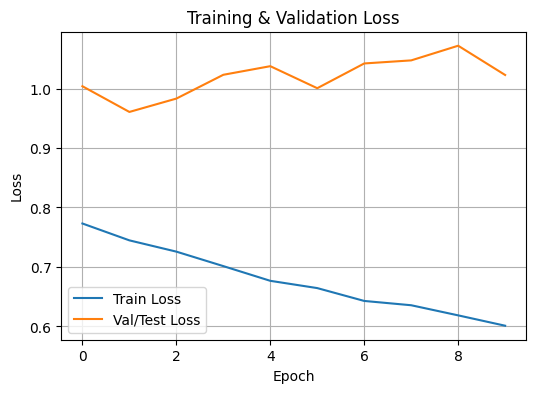

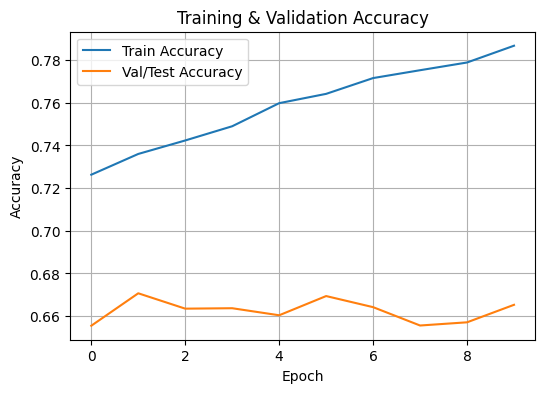

In [ ]:
# Plot Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val/Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.70      1000
           1       0.82      0.75      0.78      1000
           2       0.61      0.49      0.55      1000
           3       0.44      0.42      0.43      1000
           4       0.60      0.60      0.60      1000
           5       0.54      0.61      0.57      1000
           6       0.70      0.76      0.73      1000
           7       0.73      0.74      0.73      1000
           8       0.77      0.80      0.79      1000
           9       0.69      0.82      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000



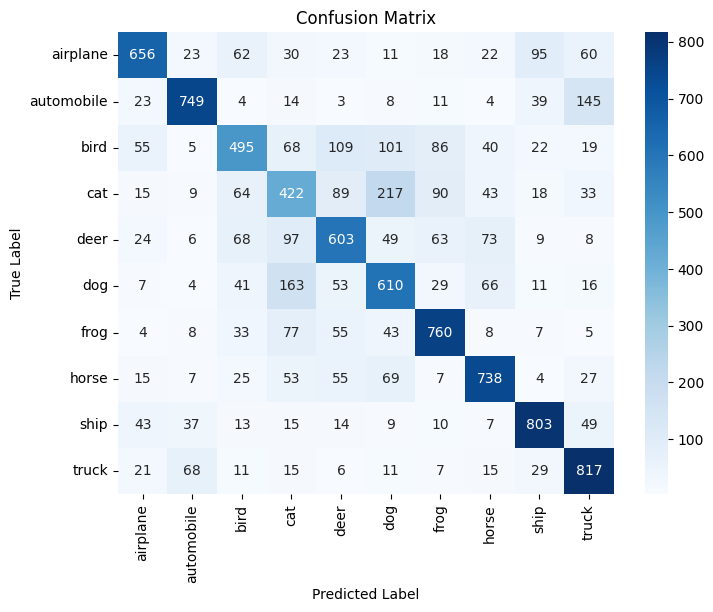

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Prediksi probabilitas
y_pred_prob = cnn.predict(x_test)

# Ubah ke label kelas (0–9)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)   # karena y_test masih one-hot

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

nilai besar pada confusion matrix di atas, antara lain 163 (dog dengan cat), 217 (cat dengan dog), dan 145 (automobile dan truck). Hal itu menunjukkan cat dan dog sulit dibedakan dengan input image beresolusi rendah, seperti yang ada di dataset.

Perubahan loss function

In [ ]:
from tensorflow.keras.layers import Input

cnn = Sequential([
    Input(shape=(32, 32, 3)), # Recommended way to define input shape
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.20),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
  ])

import tensorflow as tf

cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.Huber(delta=1.0),   # delta = transition point
    metrics=['mae']
)


cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0378 - mae: 0.1522
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0280 - mae: 0.1132
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0246 - mae: 0.0989
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0228 - mae: 0.0920
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0215 - mae: 0.0861
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0206 - mae: 0.0821
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0195 - mae: 0.0780
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0188 - mae: 0.0746
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0183 - mae: 0.0726
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0177 - mae: 0.0700


In [ ]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0205 - mae: 0.0769


[0.02067389525473118, 0.0770455002784729]

In [ ]:
history = cnn.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),   # supaya ada val_loss, val_mae, val_accuracy
    verbose=1
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0170 - mae: 0.0675 - val_loss: 0.0209 - val_mae: 0.0758
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0168 - mae: 0.0659 - val_loss: 0.0209 - val_mae: 0.0755
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0163 - mae: 0.0638 - val_loss: 0.0205 - val_mae: 0.0754
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0158 - mae: 0.0619 - val_loss: 0.0203 - val_mae: 0.0723
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0155 - mae: 0.0604 - val_loss: 0.0197 - val_mae: 0.0692
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0152 - mae: 0.0589 - val_loss: 0.0202 - val_mae: 0.0699
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0148 - mae: 0.0569 - val_loss: 0.0203 - val_mae: 0.0698
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0144 - mae: 0.0558 - val_loss: 0.0199 - val_mae: 0.0677
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━

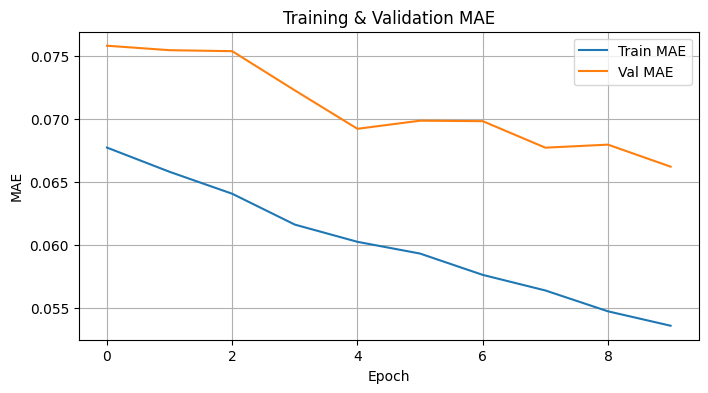

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training & Validation MAE')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1000
           1       0.86      0.80      0.83      1000
           2       0.71      0.52      0.60      1000
           3       0.56      0.51      0.53      1000
           4       0.64      0.71      0.67      1000
           5       0.62      0.68      0.65      1000
           6       0.76      0.83      0.79      1000
           7       0.76      0.76      0.76      1000
           8       0.79      0.86      0.82      1000
           9       0.76      0.82      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



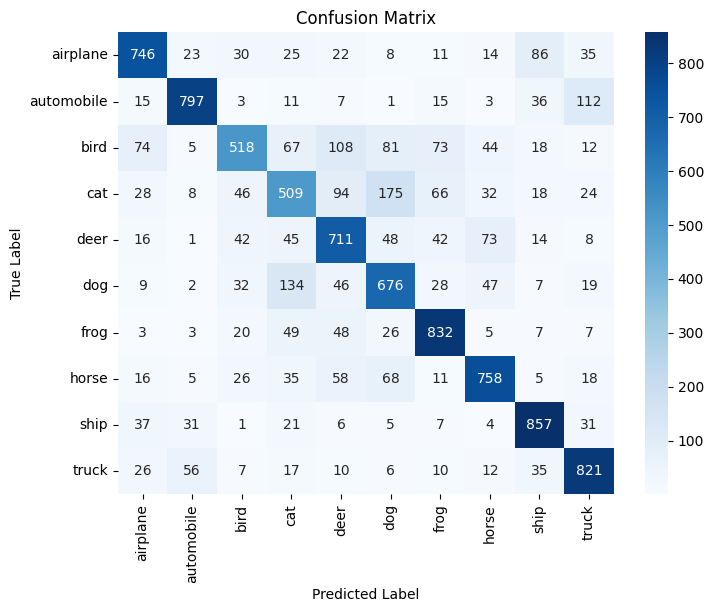

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

# ----- Prediksi -----
y_pred_prob = cnn.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# ----- Classification report -----
print("Classification Report:")
print(classification_report(y_true, y_pred))

# ----- Confusion matrix -----
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Perubahan FFNN, dense berubah dari 64 ke 16

In [ ]:
from tensorflow.keras.layers import Input

cnn = Sequential([
    Input(shape=(32, 32, 3)), # Recommended way to define input shape
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.20),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
  ])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2549 - loss: 1.9742
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4687 - loss: 1.4455
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5357 - loss: 1.2785
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5708 - loss: 1.1880
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5896 - loss: 1.1346
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6028 - loss: 1.0971
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6183 - loss: 1.0579
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6271 - loss: 1.0429
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6308 - loss: 1.0213
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6410 - loss: 1.0000


In [ ]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6449 - loss: 1.0039


[1.0091102123260498, 0.6460999846458435]

In [ ]:
history = cnn.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6484 - loss: 0.9756 - val_accuracy: 0.6497 - val_loss: 0.9884
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6553 - loss: 0.9681 - val_accuracy: 0.6275 - val_loss: 1.0261
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6576 - loss: 0.9430 - val_accuracy: 0.6398 - val_loss: 0.9977
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6652 - loss: 0.9215 - val_accuracy: 0.6517 - val_loss: 0.9761
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6717 - loss: 0.9084 - val_accuracy: 0.6590 - val_loss: 0.9601
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6764 - loss: 0.8963 - val_accuracy: 0.6745 - val_loss: 0.9347
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6852 - loss: 0.8769 - val_accuracy: 0.6720 - val_loss: 0.9403
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6968 - loss: 0.8424 -

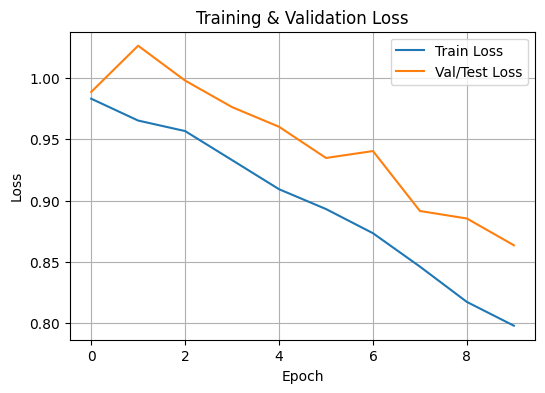

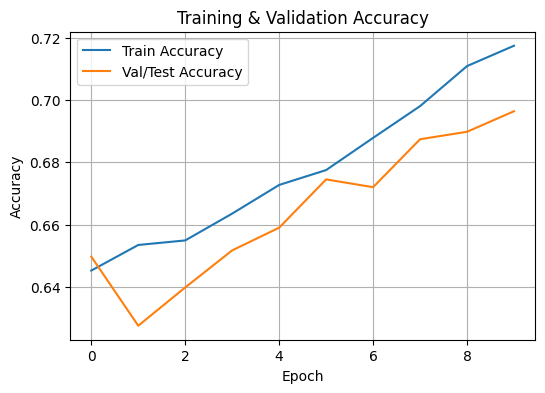

In [ ]:
# Plot Loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val/Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.83      0.87      0.85      1000
           2       0.60      0.48      0.53      1000
           3       0.51      0.53      0.52      1000
           4       0.60      0.67      0.63      1000
           5       0.63      0.55      0.59      1000
           6       0.72      0.81      0.76      1000
           7       0.70      0.78      0.74      1000
           8       0.88      0.74      0.80      1000
           9       0.80      0.82      0.81      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



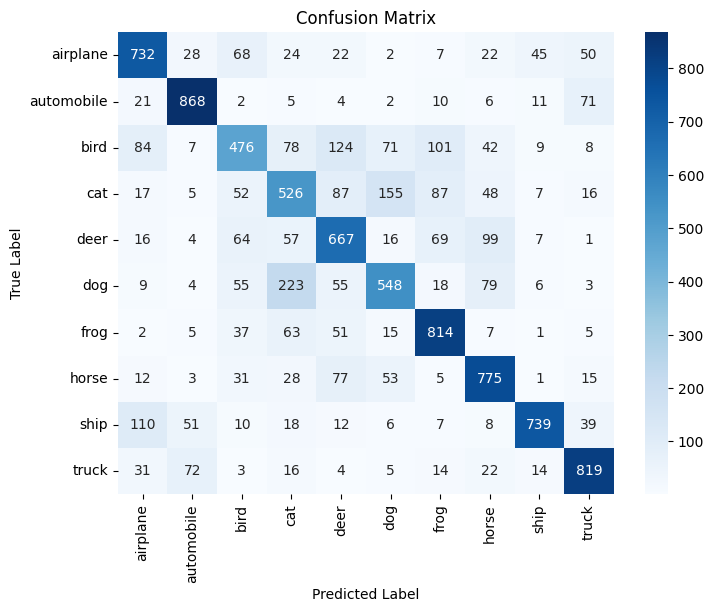

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Prediksi probabilitas
y_pred_prob = cnn.predict(x_test)

# Ubah ke label kelas (0–9)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)   # karena y_test masih one-hot

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Perubahan Epoch, dari 10 ke 5

In [ ]:
from tensorflow.keras.layers import Input

cnn = Sequential([
    Input(shape=(32, 32, 3)), # Recommended way to define input shape
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.20),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
  ])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3510 - loss: 1.7571
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5719 - loss: 1.2102
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6282 - loss: 1.0581
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6554 - loss: 0.9838
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6799 - loss: 0.9179


In [ ]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6895 - loss: 0.9040


[0.9094364047050476, 0.685699999332428]

In [ ]:
history = cnn.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)   # untuk memunculkan val_loss & val_accuracy
)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6921 - loss: 0.8793 - val_accuracy: 0.6919 - val_loss: 0.8986
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7093 - loss: 0.8348 - val_accuracy: 0.6977 - val_loss: 0.8767
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7249 - loss: 0.7890 - val_accuracy: 0.7001 - val_loss: 0.8664
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7328 - loss: 0.7614 - val_accuracy: 0.7117 - val_loss: 0.8428
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7435 - loss: 0.7353 - val_accuracy: 0.7087 - val_loss: 0.8747


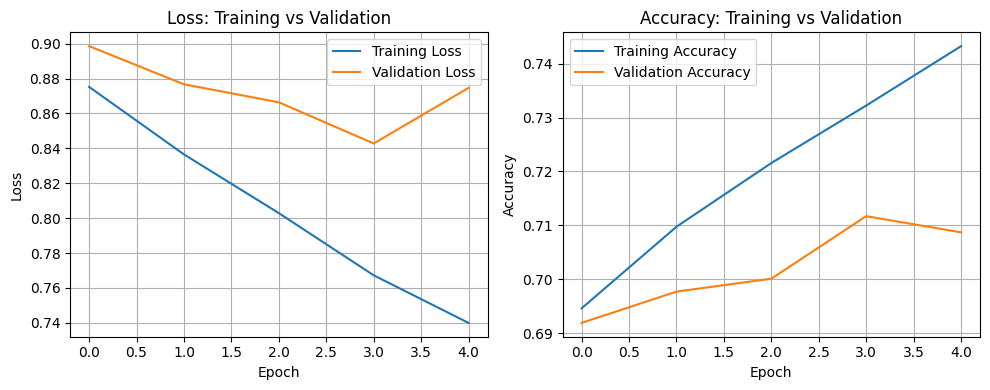

In [ ]:
import matplotlib.pyplot as plt

# --- Plot Loss ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss: Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- Plot Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy: Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1000
           1       0.83      0.82      0.82      1000
           2       0.59      0.61      0.60      1000
           3       0.58      0.45      0.50      1000
           4       0.64      0.68      0.66      1000
           5       0.64      0.61      0.62      1000
           6       0.68      0.86      0.76      1000
           7       0.76      0.73      0.75      1000
           8       0.84      0.77      0.81      1000
           9       0.80      0.77      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



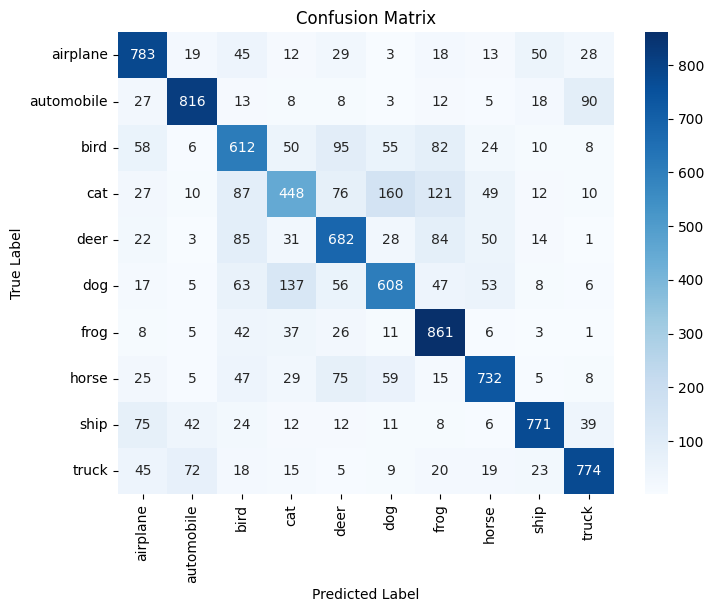

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Prediksi probabilitas
y_pred_prob = cnn.predict(x_test)

# Ubah ke label kelas (0–9)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)   # karena y_test masih one-hot

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# initiate RMSprop optimizer
opt = RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
batch_size = 4
num_classes = 10
epochs = 5
data_augmentation = True

# Data Augmentation

In [ ]:
history = None
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,            # set input mean to 0 over the dataset
    samplewise_center=False,            # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,   # divide each input by its std
    zca_whitening=False,                # apply ZCA whitening
    zca_epsilon=1e-6,                   # epsilon for ZCA whitening
    rotation_range=0,                   # rotate images in the range (0 to 180 degrees)
    width_shift_range=0.1,              # shift images horizontally (fraction of total width)
    height_shift_range=0.1,             # shift images vertically (fraction of total height)
    shear_range=0.,                     # shear
    zoom_range=0.,                      # zoom
    channel_shift_range=0.,             # channel shifts
    fill_mode='nearest',                # how to fill points outside boundaries
    cval=0.,
    horizontal_flip=True,               # randomly flip images horizontally
    vertical_flip=False,                # vertically flip (not useful here)
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0
)

# Compute quantities required for feature-wise normalization
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test)
    # no 'workers' argument here
    # no 'use_multiprocessing' either
)

Using real-time data augmentation.
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12500/12500 ━━━━━━━━━━━━━━━━━━━━ 66s 5ms/step - accuracy: 0.2910 - loss: 1.9076 - val_accuracy: 0.4930 - val_loss: 1.3930
Epoch 2/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.4724 - loss: 1.4691 - val_accuracy: 0.5405 - val_loss: 1.2814
Epoch 3/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.5143 - loss: 1.3733 - val_accuracy: 0.5919 - val_loss: 1.1393
Epoch 4/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.5404 - loss: 1.3339 - val_accuracy: 0.5770 - val_loss: 1.2210
Epoch 5/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.5490 - loss: 1.2948 - val_accuracy: 0.5919 - val_loss: 1.2466


# Modeling + Evaluation with Data Augmentation

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


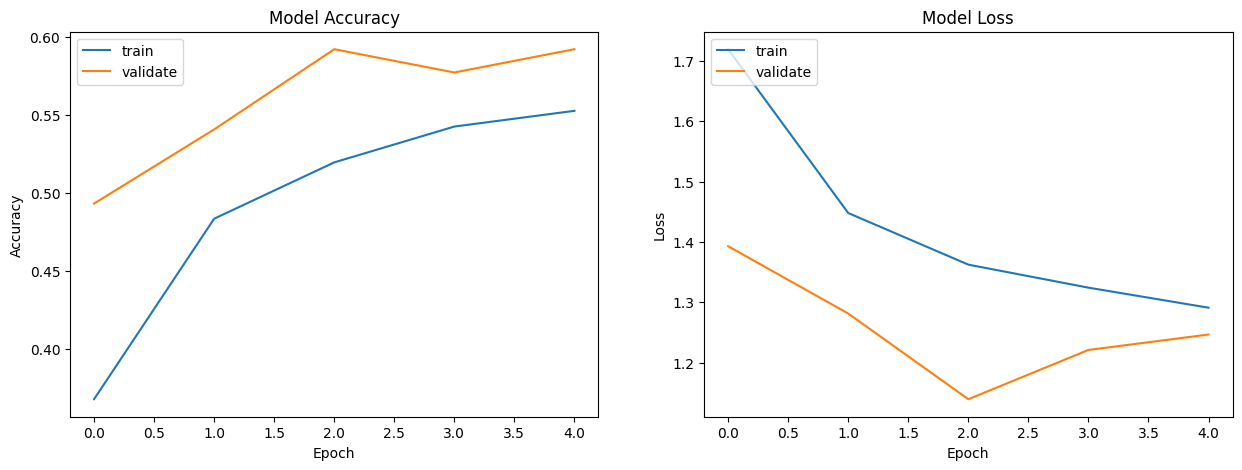

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Make prediction.
pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5937 - loss: 1.2439
Test loss: 1.2465691566467285
Test accuracy: 0.5918999910354614
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts


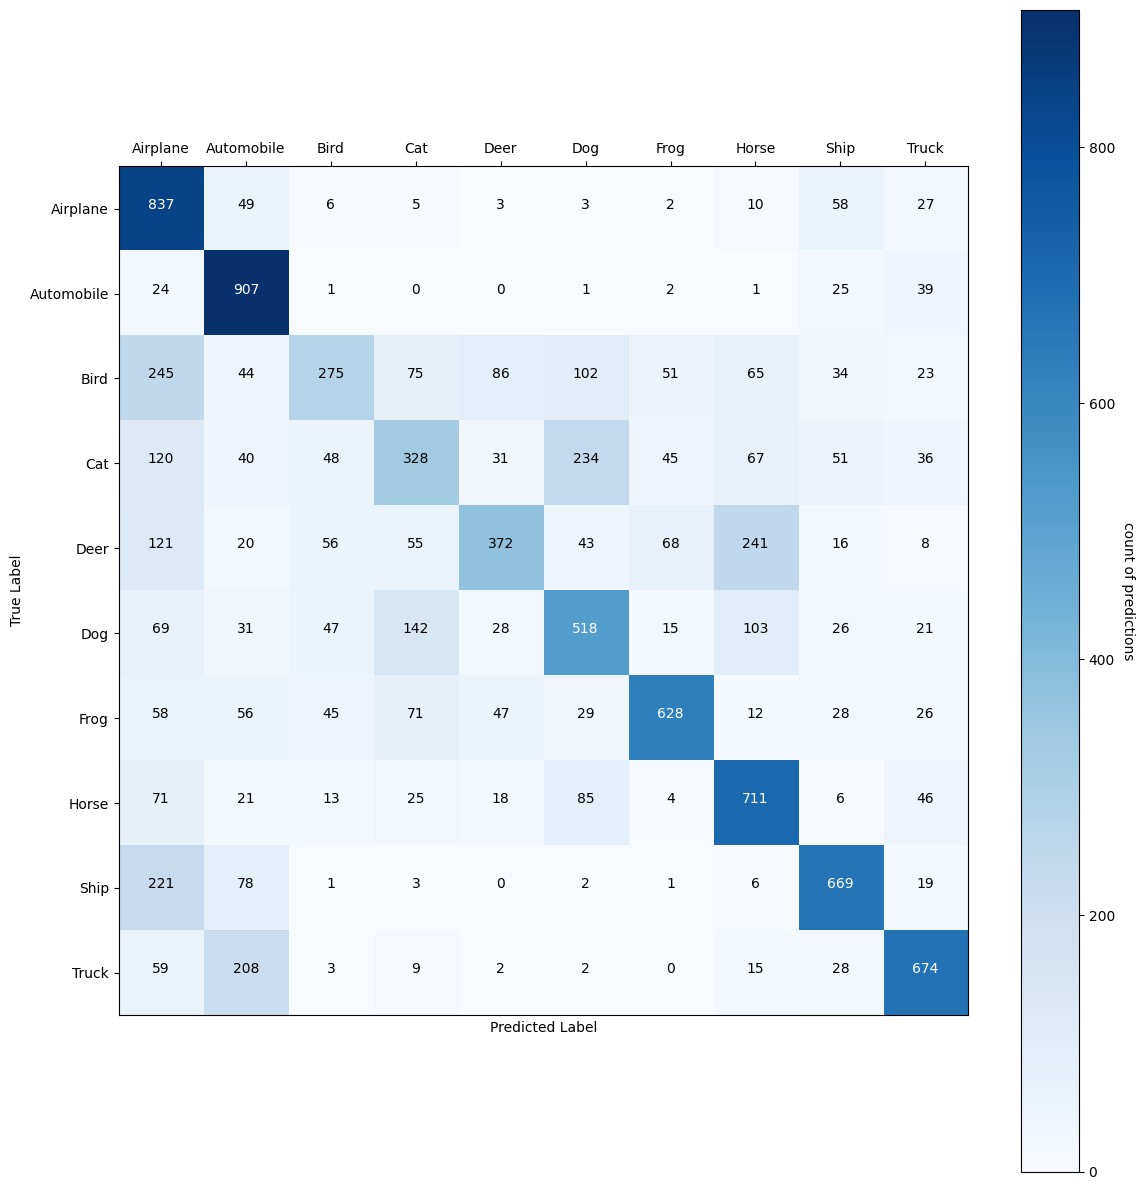

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.46      0.84      0.59      1000
           1       0.62      0.91      0.74      1000
           2       0.56      0.28      0.37      1000
           3       0.46      0.33      0.38      1000
           4       0.63      0.37      0.47      1000
           5       0.51      0.52      0.51      1000
           6       0.77      0.63      0.69      1000
           7       0.58      0.71      0.64      1000
           8       0.71      0.67      0.69      1000
           9       0.73      0.67      0.70      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.58     10000
weighted avg       0.60      0.59      0.58     10000



In [ ]:
history = None
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,            # set input mean to 0 over the dataset
    samplewise_center=False,            # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,   # divide each input by its std
    zca_whitening=False,                # apply ZCA whitening
    zca_epsilon=1e-6,                   # epsilon for ZCA whitening
    rotation_range=0,                   # rotate images in the range (0 to 180 degrees)
    width_shift_range=0.1,              # shift images horizontally (fraction of total width)
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0
)

# Compute quantities required for feature-wise normalization
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test)
    # no 'workers' argument here
    # no 'use_multiprocessing' either
)

Using real-time data augmentation.
Epoch 1/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - accuracy: 0.5405 - loss: 1.4002 - val_accuracy: 0.5169 - val_loss: 1.4046
Epoch 2/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.5132 - loss: 1.5016 - val_accuracy: 0.5099 - val_loss: 1.4823
Epoch 3/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.4910 - loss: 1.5848 - val_accuracy: 0.4485 - val_loss: 1.6182
Epoch 4/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.4745 - loss: 1.6409 - val_accuracy: 0.5197 - val_loss: 1.4145
Epoch 5/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.4639 - loss: 1.6604 - val_accuracy: 0.4199 - val_loss: 1.6106


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


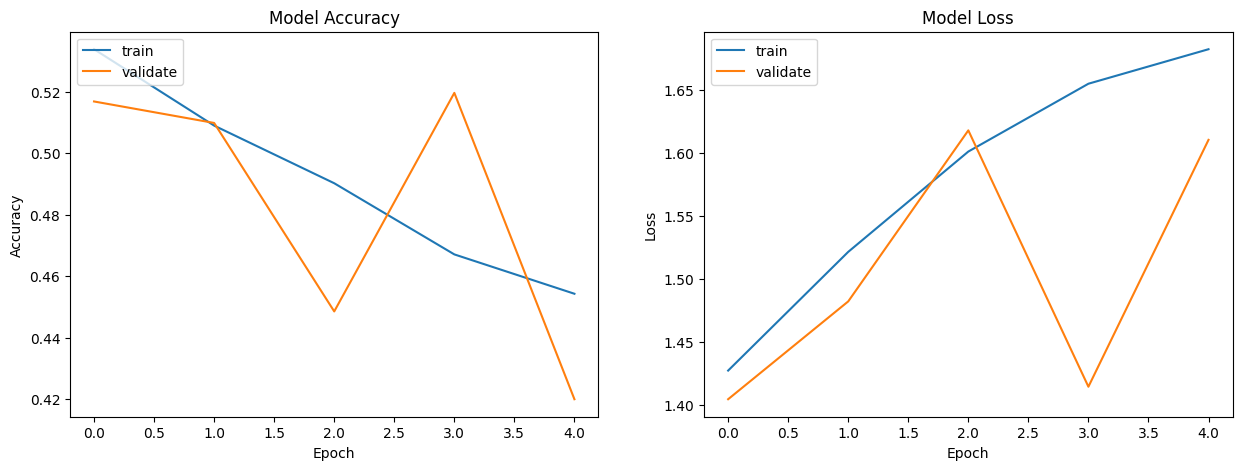

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Make prediction.
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4204 - loss: 1.6077
Test loss: 1.6106438636779785
Test accuracy: 0.41990000009536743
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

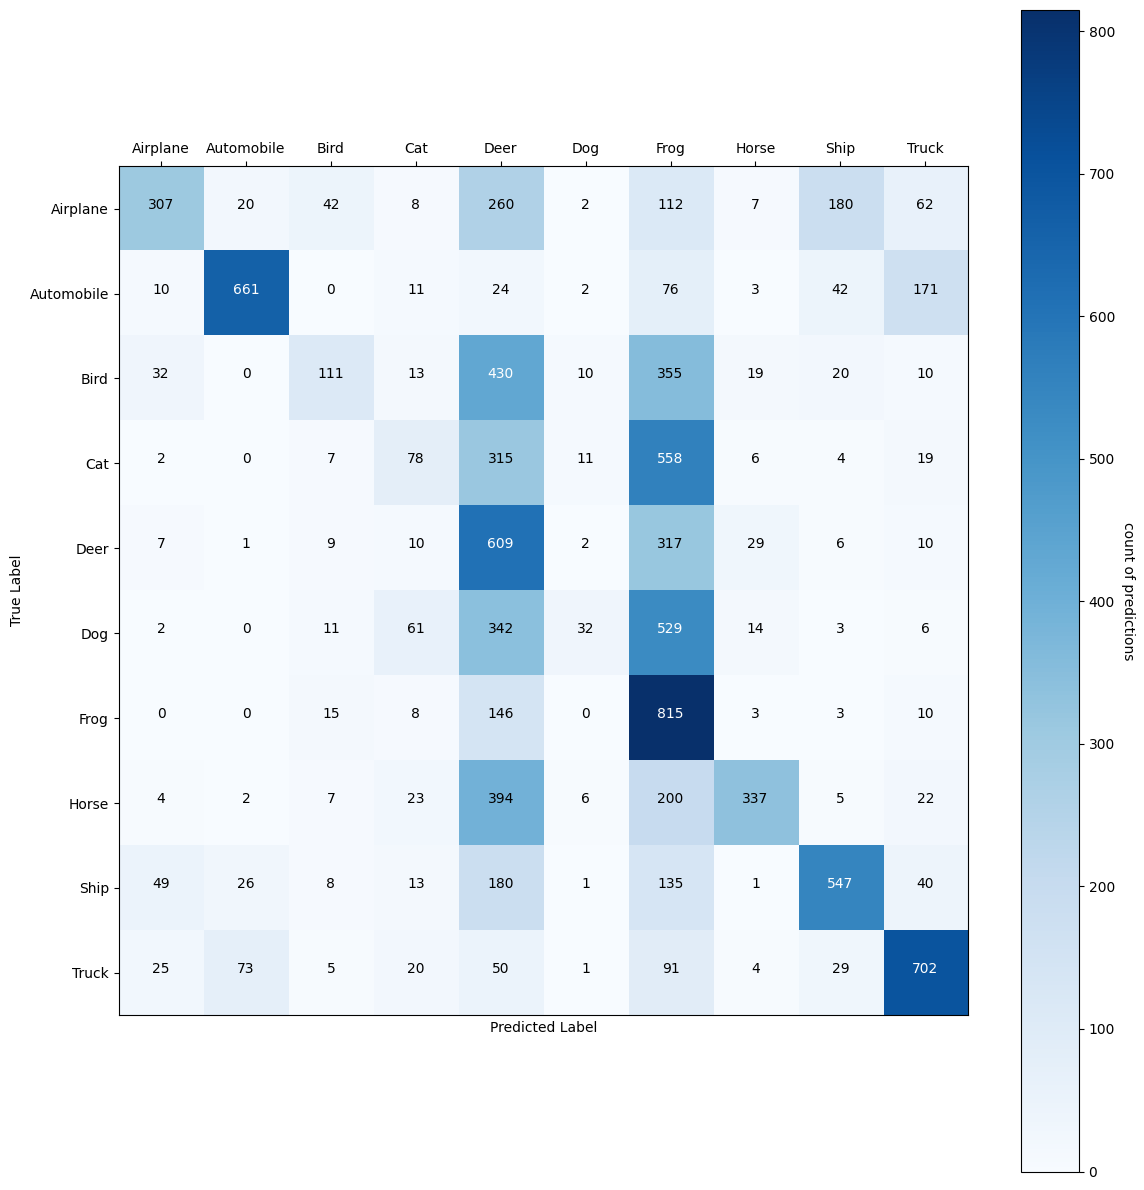

              precision    recall  f1-score   support

           0       0.70      0.31      0.43      1000
           1       0.84      0.66      0.74      1000
           2       0.52      0.11      0.18      1000
           3       0.32      0.08      0.13      1000
           4       0.22      0.61      0.32      1000
           5       0.48      0.03      0.06      1000
           6       0.26      0.81      0.39      1000
           7       0.80      0.34      0.47      1000
           8       0.65      0.55      0.59      1000
           9       0.67      0.70      0.68      1000

    accuracy                           0.42     10000
   macro avg       0.55      0.42      0.40     10000
weighted avg       0.55      0.42      0.40     10000



In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

print(classification_report(Y_true, Y_pred_classes))

In [ ]:
history = None
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,            # set input mean to 0 over the dataset
    samplewise_center=False,            # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,   # divide each input by its std
    zca_whitening=False,                # apply ZCA whitening
    zca_epsilon=1e-6,                   # epsilon for ZCA whitening
    rotation_range=0,                   # rotate images in the range (0 to 180 degrees)
    height_shift_range=0.1,             # shift images vertically (fraction of total height)
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0
)

# Compute quantities required for feature-wise normalization
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test)
    # no 'workers' argument here
    # no 'use_multiprocessing' either
)

Using real-time data augmentation.
Epoch 1/5
   24/12500 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.4545 - loss: 1.5717 

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12500/12500 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.4347 - loss: 1.7437 - val_accuracy: 0.4148 - val_loss: 1.7040
Epoch 2/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.4027 - loss: 1.8416 - val_accuracy: 0.2752 - val_loss: 1.9255
Epoch 3/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - accuracy: 0.3699 - loss: 1.9500 - val_accuracy: 0.2854 - val_loss: 1.9655
Epoch 4/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.3219 - loss: 2.1092 - val_accuracy: 0.3034 - val_loss: 1.9172
Epoch 5/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.2812 - loss: 2.1825 - val_accuracy: 0.2375 - val_loss: 2.0557


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


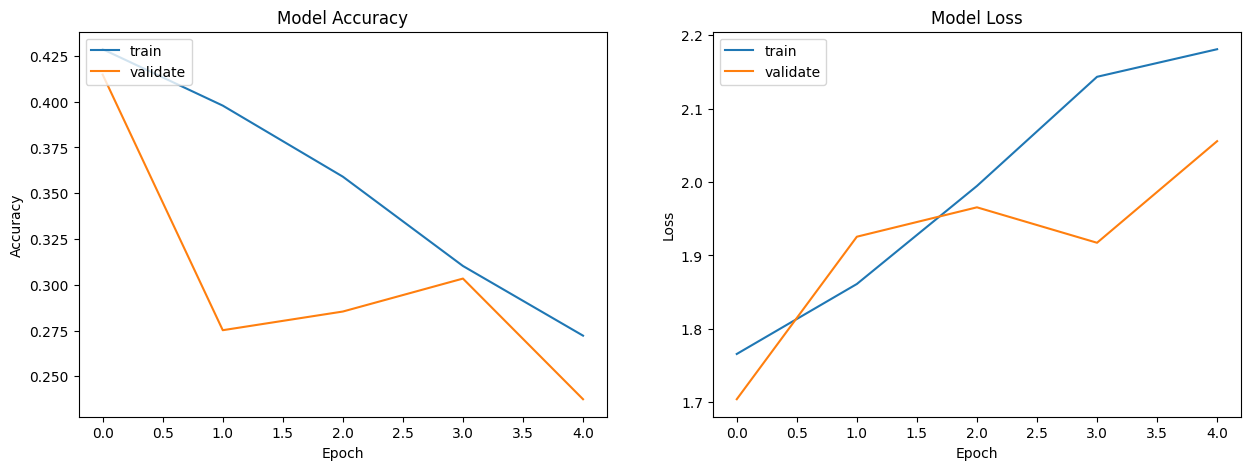

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Make prediction.
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2430 - loss: 2.0522
Test loss: 2.0556602478027344
Test accuracy: 0.23749999701976776
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Pilihan jenis data augmentasi yang baik adalah kombinasi dari beberapa data augmentasi, yaitu width shift, height shift, horizontal flip, dan fill mode. Kelebihan dari data augmentasi antara lain, mengurangi overfitting, memperbesar ukuran dataset, dan meningkatkan generalisasi model. Kekurangannya adalah memperlama waktu training, bisa saja menurunkan akurasi (seperti yang terjadi di atas), dan risiko augmentasi yang tidak relevan.

# Kesimpulan

Pada praktikum ini diuji berbagai variasi CNN (arsitektur, optimizer, kernel, filter, epoch, batch size, dan data augmentation) menggunakan dataset CIFAR-10. Sebagian besar model mengalami overfitting, terlihat dari selisih besar antara akurasi training dan validasi serta meningkatnya validation loss. Hal ini terutama disebabkan oleh kurangnya regularisasi, batch size yang kecil, dan augmentasi yang terbatas.

Model dengan kinerja terbaik adalah CNN yang lebih dalam (32–32–64–64) dengan dropout 0.25–0.5, optimizer RMSProp ber-learning rate rendah, serta data augmentation (shift dan horizontal flip). Kombinasi ini menghasilkan learning curve yang paling stabil, gap overfitting paling kecil, dan akurasi validasi terbaik, sehingga memberikan generalisasi paling baik pada CIFAR-10.

Sebenarnya, ada beberapa model (tanpa data augmentasi) dengan akurasi >0.70, tetapi tidak dipilih sebagai model terbaik. Hal ini karena walaupun akurasinya tinggi, model tersebut overfitting berat, tidak stabil, tidak memiliki learning curve bagus, gap train–validation terlalu besar, dan tidak dapat digeneralisasi (hanya bagus di data saat ini).